# Binary Cancer Classification

In [1]:
import pandas as pd
import numpy as np
import torch
import os
import matplotlib.pyplot as plt


In [2]:
path1_cancer = '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/'
path1_non_cancer = '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Non_Cancer/'

In [3]:
p1=os.listdir(path1_cancer+'Training')
p2 = os.listdir(path1_non_cancer+'Training')
l1 = [path1_cancer+'Training/'+x for x in p1]
l2 = [path1_non_cancer+'Training/'+x for x in p2]
img_paths1_train = np.hstack([l1,l2])

p1=os.listdir(path1_cancer+'Testing')
p2 = os.listdir(path1_non_cancer+'Testing')
l1 = [path1_cancer+'Testing/'+x for x in p1]
l2 = [path1_non_cancer+'Testing/'+x for x in p2]
img_paths1_test = np.hstack([l1,l2])
len(img_paths1_train)

labels1_train=[]
for i in img_paths1_train:
    if 'Non_Cancer' in i:
        labels1_train.append(0)
    else:
        labels1_train.append(1)

labels1_test=[]
for i in img_paths1_test:
    if 'Non_Cancer' in i:
        labels1_test.append(0)
    else:
        labels1_test.append(1)
labels1_test

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [4]:
img_paths1_train

array(['../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1007-1.jpg',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1010-01.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1012-2.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1031-1.jpg',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1051-3(94).jpg',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1051-3(95).jpg',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/113-1.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1157-01.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/120.2.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1239-2.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Tr

In [5]:
path2_cancer_test = '../datasets/cancer/binary/binary-skin-cancer2/data/test/malignant/'
path2_non_cancer_test = '../datasets/cancer/binary/binary-skin-cancer2/data/test/benign/'

path2_cancer_train = '../datasets\\cancer\\binary\\binary-skin-cancer2\\data\\train\\malignant/'
path2_non_cancer_train = '../datasets\\cancer\\binary\\binary-skin-cancer2\\data\\train\\benign/'

In [6]:
p1=os.listdir(path2_cancer_test)
p2 = os.listdir(path2_non_cancer_test)
l1 = [path2_cancer_test+x for x in p1]
l2 = [path2_non_cancer_test+x for x in p2]
img_paths2_test = np.hstack([l1,l2])

labels2_test=[]
for i in img_paths2_test:
    if 'benign' in i:
        labels2_test.append(0)
    else:
        labels2_test.append(1)


p1=os.listdir(path2_cancer_train)
p2 = os.listdir(path2_non_cancer_train)
l1 = [path2_cancer_train+x for x in p1]
l2 = [path2_non_cancer_train+x for x in p2]
img_paths2_train = np.hstack([l1,l2])

labels2_train=[]
for i in img_paths2_train:
    if 'benign' in i:
        labels2_train.append(0)
    else:
        labels2_train.append(1)
labels2_test


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [7]:
test_paths = np.hstack([img_paths1_test,img_paths2_test])
test_labels = np.hstack([labels1_test,labels2_test])

train_paths = np.hstack([img_paths1_train,img_paths2_train])
train_labels = np.hstack([labels1_train,labels2_train])
train_paths

array(['../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1007-1.jpg',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1010-01.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1012-2.JPG',
       ...,
       '../datasets\\cancer\\binary\\binary-skin-cancer2\\data\\train\\benign/996.jpg',
       '../datasets\\cancer\\binary\\binary-skin-cancer2\\data\\train\\benign/997.jpg',
       '../datasets\\cancer\\binary\\binary-skin-cancer2\\data\\train\\benign/999.jpg'],
      dtype='<U88')

In [8]:
train_labels

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
train_labels.shape

(2877,)

In [10]:
train_paths.shape

(2877,)

In [11]:
test_paths.shape

(708,)

In [12]:
import cv2
count=0
test_images = np.zeros([len(test_paths),224,224,3])
for i in test_paths:
    im= cv2.resize(cv2.imread(i),[224,224])
    im = (im-np.nanmin(im))/(np.nanmax(im)-np.nanmin(im))
    im = np.nan_to_num(im)
    test_images[count]=im
    count=count+1

In [13]:
import cv2
count=0
train_images = np.zeros([2877,224,224,3])
for i in train_paths:
    im= cv2.resize(cv2.imread(i),[224,224])
    im = (im-np.nanmin(im))/(np.nanmax(im)-np.nanmin(im))
    im = np.nan_to_num(im)
    train_images[count]=im
    count=count+1

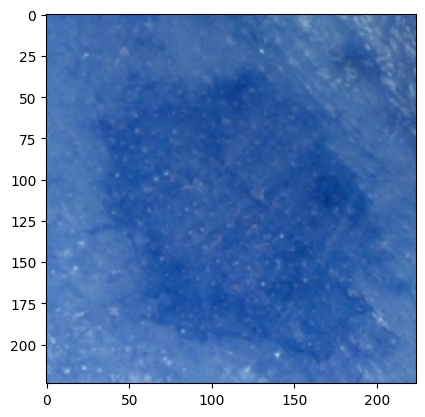

In [14]:
plt.imshow(train_images[2],cmap='jet')

In [14]:
import timm
import torch.nn as nn
# model = nn.Sequential(timm.create_model('davit_tiny.msft_in1k', drop_path_rate=.2,num_classes=1,pretrained=True), nn.Sigmoid())
# model

In [15]:
train_images = torch.tensor(train_images)
test_images = torch.tensor(test_images)
train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)

In [16]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        images = self.images[index]
        labels = self.labels[index]
        return images.float(), labels.float()


In [37]:
from torch.optim.lr_scheduler import ExponentialLR
import torch.optim as optim

dataset = CustomDataset(train_images, train_labels)
# Create a dataloader
batch_size = 32

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,drop_last=False,num_workers=0)#,sampler=sampler)
dataset_test = CustomDataset(test_images,test_labels)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 64
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)

criterion = nn.BCELoss()
# optimizer = optim.AdamW(model.parameters(),lr=0.0001,weight_decay=.001)
# gamma = .9994
# scheduler = ExponentialLR(optimizer, gamma=gamma)

In [38]:
x,y = next(iter(dataloader))

tensor(1.)

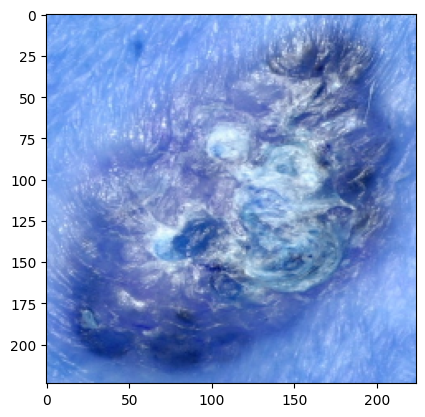

In [39]:
plt.imshow(x[0])
y[0]

In [40]:
torch.cuda.empty_cache()
gc.collect()

3124

In [44]:
import gc

device='cuda'
model = nn.Sequential(timm.create_model('davit_base.msft_in1k', drop_path_rate=.7,num_classes=1,pretrained=True), nn.Sigmoid())
model.to(device)
optimizer = optim.AdamW(model.parameters(),lr=0.00015,weight_decay=5)
gamma = .994
scheduler = ExponentialLR(optimizer, gamma=gamma)
num_epochs = 6

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for x,y in dataloader:
        x = x.permute(0,3,1,2)
        optimizer.zero_grad()
        outputs= model(x.to(device))
        loss = criterion(outputs.squeeze(1), y.to(device))
        loss.backward()
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(dataloader)
    
    model.eval()
    running_loss2=0
    with torch.no_grad():
        for x,y_tst in test_dataloader:
            x = x.permute(0,3,1,2)
            outputs_tst = model(x.to(device))
            loss2 = criterion(outputs_tst.squeeze(1), y_tst.to(device))
            running_loss2 += loss2.item()
    epoch_loss2 = running_loss2 / len(test_dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.5f},  Test Loss: {epoch_loss2:.5f}, Learning Rate: {optimizer.param_groups[0]['lr']:.7f}")
    torch.cuda.empty_cache()
    gc.collect()
print("Training finished!")

Epoch [1/6], Loss: 0.40920,  Test Loss: 0.33663, Learning Rate: 0.0000873
Epoch [2/6], Loss: 0.27417,  Test Loss: 0.24948, Learning Rate: 0.0000508
Epoch [3/6], Loss: 0.23162,  Test Loss: 0.23315, Learning Rate: 0.0000295
Epoch [4/6], Loss: 0.18908,  Test Loss: 0.22742, Learning Rate: 0.0000172
Epoch [5/6], Loss: 0.16378,  Test Loss: 0.24013, Learning Rate: 0.0000100
Epoch [6/6], Loss: 0.15406,  Test Loss: 0.23085, Learning Rate: 0.0000058
Training finished!


In [14]:
from torchmetrics.classification import BinaryF1Score, BinaryPrecision, BinaryRecall, BinaryAccuracy, BinaryROC, BinaryAUROC


F1 Score: tensor(1.)
Precision: tensor(1.)
Recall: tensor(1.)
Accuracy: tensor(1.)
ROC Curve: ([tensor([0.0000, 0.0000, 0.5000, 1.0000]), tensor([0.0000, 0.0000, 0.5000, 1.0000]), tensor([0.0000, 0.0000, 0.5000, 1.0000])], [tensor([0., 1., 1., 1.]), tensor([0., 1., 1., 1.]), tensor([0., 1., 1., 1.])], [tensor([1.0000, 0.4000, 0.2000, 0.1000]), tensor([1.0000, 0.6000, 0.3000, 0.2000]), tensor([1.0000, 0.5000, 0.4000, 0.3000])])
AUROC: tensor(1.)


In [12]:
def find_optim_thres(fpr, tpr, thresholds):
    optim_thres = thresholds[0]
    inx = 0
    min_dist = 1.0
    for i in range(len(fpr)):
        dist = np.linalg.norm(np.array([0.0, 1.0]) - np.array([fpr[i], tpr[i]]))
        if dist < min_dist:
            min_dist = dist
            optim_thres = thresholds[i]
            inx = i
            
    return optim_thres, inx
    
def test_model(model,criterion,dataloader, threshold=.5):
    device='cuda'
    since = time.time()
    metricf1 = BinaryF1Score()
    precision = BinaryPrecision()
    recall = BinaryRecall()
    accuracy = BinaryAccuracy()
    roc = BinaryROC()
    auc = BinaryAUROC()
    stop_count = 0
    best_f1 = -1.0
    test_metrics = {'loss' : [], 'acc' : [], 'f1': [], 'precision': [], 'recall': [], 'auc': []}
    # inital threshold for first epoch, it will change afterwards
#     threshold = 0.5
    print('Starting testing...')
    # empty 'all' tensors for saving
    all_outputs = torch.Tensor([])
    all_labels = torch.Tensor([])
    model.eval()   # Set model to evaluate mode
    running_loss = 0.0
    n_samples = 0
    n_correct = 0
    running_f1 = 0.0
    # Iterate over data.
    for inputs, labels in (dataloader):
        labels = torch.unsqueeze(torch.tensor(labels), 1).to(dtype=torch.float)               
        #labels=torch.tensor(labels)
        inputs = inputs.permute(0,3,1,2)
        inputs = inputs.float().to(device)
        #inputs = inputs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
        # zero the parameter gradients
            outputs = model(inputs)
            #preds = (outputs > threshold).double()
            # concatenating all outputs and labels for calculation aoc and new threshold
            all_outputs = torch.cat((all_outputs, outputs.to('cpu')))
            all_labels = torch.cat((all_labels, labels.to('cpu')))                  
            #print(labels)
            # _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
        running_loss += loss.item()
        #n_correct += (preds == labels).sum().item()
        # collect any unused memmory
        gc.collect()
        torch.cuda.empty_cache()  
        
    # statistics
    epoch_loss = running_loss / len(dataloader)            
    # find true positive and false positive rates for ROC curve
    #print ('outputs: ', all_outputs, 'labels', all_labels)
    all_labels=all_labels.to(dtype=torch.long)
    fpr, tpr, thresholds = roc(all_outputs, all_labels)
    epoch_auc = auc(all_outputs, all_labels)
    # find new threshold
    threshold, _ = find_optim_thres(fpr, tpr, thresholds)
    print(f'New threshold is {threshold}')
    # calculate metrics using new optimized threshold
    epoch_f1 = metricf1(all_outputs > threshold, all_labels)
    epoch_acc = accuracy(all_outputs > threshold, all_labels)
    epoch_precision = precision(all_outputs > threshold, all_labels)
    epoch_recall = recall(all_outputs > threshold, all_labels)
    # save all of the statistics for latter analysis
    test_metrics['loss'].append(epoch_loss)
    test_metrics['acc'].append(epoch_acc)
    test_metrics['f1'].append(epoch_f1)
    test_metrics['precision'].append(epoch_precision)
    test_metrics['recall'].append(epoch_recall)
    test_metrics['auc'].append(epoch_auc)               
    time_elapsed = time.time() - since

    print(f'Inference complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'F1 Score = : {epoch_f1:4f}')
    print(f'AUC Score = : {epoch_auc:4f}')
    print(f'Acc Score = : {epoch_acc:4f}')
    return test_metrics

In [64]:
import time
import tqdm
test_metrics = test_model(model, criterion, test_dataloader)

model_name = 'davit_base'
PATH='weights/'+model_name
torch.save(model.state_dict(), PATH)


Starting testing...


C:\Users\marcb\AppData\Local\Temp\ipykernel_7948\539848122.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.unsqueeze(torch.tensor(labels), 1).to(dtype=torch.float)


New threshold is 0.32165274024009705
Inference complete in 0m 3s
F1 Score = : 0.899536
AUC Score = : 0.967087
Acc Score = : 0.908192


In [65]:
model_name = 'davit_base'
PATH='weights/'+model_name
torch.save(model.state_dict(), PATH)

# Multiclass Cancer Classification

## Multiclass model 1 (currently not training)

In [1]:
import pandas as pd
import numpy as np
import torch
import os
import matplotlib.pyplot as plt

path1_test= '../datasets/cancer/multiclass/ISIC/Test/'
p1=os.listdir(path1_test)
full_files=[]
full_labels=[]
for i in p1:
    labels=[]
    files = os.listdir(path1_test+i)
    files = [path1_test+i+'/'+x for x in files]
    full_files.append(files)
    if 'actinic' in i:
        label_pos = 0
    elif 'basal' in i:
        label_pos = 1
    elif 'dermatofibroma' in i:
        label_pos = 2
    elif 'melanoma' in i:
        label_pos = 3
    elif 'nevus' in i:
        label_pos = 4
    elif 'pigmented' in i:
        label_pos = 5
    elif 'seborrheic' in i:
        label_pos = 6
    elif 'squamous' in i:
        label_pos = 7
    elif 'vascular' in i:
        label_pos = 8

    for j in files:
        label_row = [0,0,0,0,0,0,0,0,0]
        label_row[label_pos]=1
        labels.append(label_row)
    full_labels.append(labels)


path1_train =  '../datasets/cancer/multiclass/ISIC/Train/'

In [2]:
full_labels=torch.tensor(np.vstack(full_labels))
full_files=np.hstack(full_files)
full_labels

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1]], dtype=torch.int32)

In [3]:
full_files

array(['../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0010512.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0010889.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024468.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024470.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024511.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024646.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024654.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024707.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024763.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024771.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024800.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis

In [4]:
import cv2
count=0
test_images = np.zeros([len(full_files),224,224,3])
for i in full_files:
    im= cv2.resize(cv2.imread(i),[224,224], interpolation=cv2.INTER_CUBIC)
    im = (im-np.nanmin(im))/(np.nanmax(im)-np.nanmin(im))
    im = np.nan_to_num(im)
    test_images[count]=im
    count=count+1
test_images = torch.tensor(test_images)

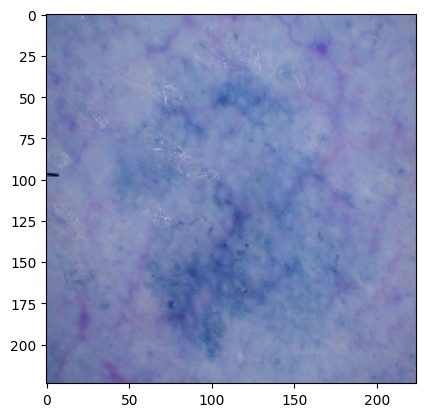

In [5]:
plt.imshow(test_images[0])

In [6]:
import pandas as pd
import numpy as np
import torch
import os
import matplotlib.pyplot as plt

path1_train =  '../datasets/cancer/multiclass/ISIC/Train/'
p1=os.listdir(path1_train)
full_files_train=[]
full_labels_train=[]
for i in p1:
    labels=[]
    files = os.listdir(path1_train+i)
    files = [path1_train+i+'/'+x for x in files]
    full_files_train.append(files)
    if 'actinic' in i:
        label_pos = 0
    elif 'basal' in i:
        label_pos = 1
    elif 'dermatofibroma' in i:
        label_pos = 2
    elif 'melanoma' in i:
        label_pos = 3
    elif 'nevus' in i:
        label_pos = 4
    elif 'pigmented' in i:
        label_pos = 5
    elif 'seborrheic' in i:
        label_pos = 6
    elif 'squamous' in i:
        label_pos = 7
    elif 'vascular' in i:
        label_pos = 8

    for j in files:
        label_row = [0,0,0,0,0,0,0,0,0]
        label_row[label_pos]=1
        labels.append(label_row)
    full_labels_train.append(labels)




In [7]:
full_labels_train=torch.tensor(np.vstack(full_labels_train))
full_files_train=np.hstack(full_files_train)
full_labels_train

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1]], dtype=torch.int32)

In [8]:
full_labels_train.shape

torch.Size([2229, 9])

In [9]:
import cv2
count=0
train_images = np.zeros([len(full_files_train),224,224,3])
for i in full_files:
    im= cv2.resize(cv2.imread(i),[224,224], interpolation=cv2.INTER_CUBIC)
    im = (im-np.nanmin(im))/(np.nanmax(im)-np.nanmin(im))
    im = np.nan_to_num(im)
    train_images[count]=im
    count=count+1
train_images = torch.tensor(train_images)

In [10]:


from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        images = self.images[index]
        labels = self.labels[index,:]
        return images.float(), labels.float()

from torch.optim.lr_scheduler import ExponentialLR
import torch.optim as optim
import torch.nn as nn

dataset = CustomDataset(train_images, full_labels_train)
# Create a dataloader
batch_size = 64

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,drop_last=False,num_workers=0)#,sampler=sampler)
dataset_test = CustomDataset(test_images,full_labels)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 64
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)

criterion = nn.CrossEntropyLoss()

In [18]:
from torch.optim.lr_scheduler import ExponentialLR
import torch.optim as optim
import torch.nn as nn

dataset = CustomDataset(train_images, full_labels_train)
# Create a dataloader
batch_size = 64

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,drop_last=False,num_workers=0)#,sampler=sampler)
dataset_test = CustomDataset(test_images,full_labels)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 64
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)

criterion = nn.CrossEntropyLoss()

In [12]:
len(test_images)

128

In [19]:
timm.list_models()

['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r

In [14]:
torch.cuda.empty_cache()
gc.collect()

477

In [24]:
import gc
import timm
device='cuda'
model = nn.Sequential(timm.create_model('efficientformerv2_s0', drop_path_rate=.0,num_classes=9,pretrained=True), nn.Softmax(dim=1))
model.to(device)
optimizer = optim.AdamW(model.parameters(),lr=0.0004,weight_decay=0.0001)
gamma = .9994
scheduler = ExponentialLR(optimizer, gamma=gamma)
num_epochs = 60

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for x,y in dataloader:
        x = x.permute(0,3,1,2)
        optimizer.zero_grad()
        outputs= model(x.to(device))
        loss = criterion(outputs.squeeze(1), y.to(device))
        loss.backward()
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(dataloader)
    
    model.eval()
    running_loss2=0
    with torch.no_grad():
        for x,y_tst in test_dataloader:
            x = x.permute(0,3,1,2)
            outputs_tst = model(x.to(device))
            loss2 = criterion(outputs_tst.squeeze(1), y_tst.to(device))
            running_loss2 += loss2.item()
    epoch_loss2 = running_loss2 / len(test_dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.5f},  Test Loss: {epoch_loss2:.5f}, Learning Rate: {optimizer.param_groups[0]['lr']:.7f}")
    torch.cuda.empty_cache()
    gc.collect()
print("Training finished!")

Epoch [1/60], Loss: 2.14290,  Test Loss: 2.23139, Learning Rate: 0.0003917
Epoch [2/60], Loss: 2.10432,  Test Loss: 2.24685, Learning Rate: 0.0003835
Epoch [3/60], Loss: 2.09249,  Test Loss: 2.24672, Learning Rate: 0.0003756
Epoch [4/60], Loss: 2.08454,  Test Loss: 2.24683, Learning Rate: 0.0003678
Epoch [5/60], Loss: 2.08406,  Test Loss: 2.24683, Learning Rate: 0.0003601
Epoch [6/60], Loss: 2.08656,  Test Loss: 2.24692, Learning Rate: 0.0003526
Epoch [7/60], Loss: 2.08310,  Test Loss: 2.24685, Learning Rate: 0.0003453
Epoch [8/60], Loss: 2.08145,  Test Loss: 2.24689, Learning Rate: 0.0003381
Epoch [9/60], Loss: 2.08177,  Test Loss: 2.24693, Learning Rate: 0.0003311
Epoch [10/60], Loss: 2.08136,  Test Loss: 2.24690, Learning Rate: 0.0003242
Epoch [11/60], Loss: 2.08264,  Test Loss: 2.24694, Learning Rate: 0.0003175
Epoch [12/60], Loss: 2.08502,  Test Loss: 2.24694, Learning Rate: 0.0003109
Epoch [13/60], Loss: 2.08130,  Test Loss: 2.24694, Learning Rate: 0.0003044
Epoch [14/60], Loss: 

KeyboardInterrupt: 

## Multiclass model 2

In [1]:
import pandas as pd
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import cv2
# path1_test= '../datasets/cancer/multiclass/ISIC/Test/'
# p1=os.listdir(path1_test)
# full_files=[]
# full_labels=[]
base='../datasets/cancer/multiclass/ham10000/'
meta = pd.read_csv(base+'GroundTruth.csv')


In [2]:
from joblib import Parallel, delayed
import cv2
import numpy as np

def process_image(i, base, meta):
    im = cv2.resize(cv2.imread(base + 'images/' + meta.image[i] + '.jpg'), [400, 400], interpolation=cv2.INTER_LANCZOS4)
    im = (im - np.nanmin(im)) / (np.nanmax(im) - np.nanmin(im))
    im = np.nan_to_num(im)
    return im

images = np.zeros([len(meta), 400, 400, 3])

results = Parallel(n_jobs=8)(delayed(process_image)(i, base, meta) for i in range(len(meta)))

for i, im in enumerate(results):
    images[i] = im

In [3]:
del results
import gc
gc.collect()

26

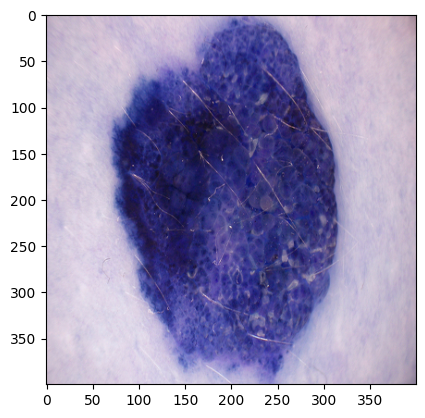

In [4]:
plt.imshow(images[-1])

In [5]:
labels_OH = np.array(meta.iloc[0:,1:])
labels_OH

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [6]:
labels=np.zeros([len(labels_OH),])
for i in range(len(labels_OH)):
    idx=np.where(labels_OH[i]==1)[0].item()
    labels[i] = idx
labels

array([1., 1., 1., ..., 4., 1., 1.])

In [7]:
train_images=images[1000:]
test_images=images[:1000]

labels_train = labels[1000:]
labels_test = labels[:1000]



In [8]:
del images, labels
gc.collect()

39

In [9]:
train_images = torch.tensor(train_images)
test_images = torch.tensor(test_images)

labels_train = torch.tensor(labels_train)
labels_test = torch.tensor(labels_test)

In [10]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        images = self.images[index]
        labels = self.labels[index]
        return images.float(), labels.float()

from torch.optim.lr_scheduler import ExponentialLR
import torch.optim as optim
import torch.nn as nn

dataset = CustomDataset(train_images, labels_train)
# Create a dataloader
batch_size = 64

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,drop_last=False,num_workers=0)#,sampler=sampler)
dataset_test = CustomDataset(test_images,labels_test)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 128
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)

criterion = nn.CrossEntropyLoss()

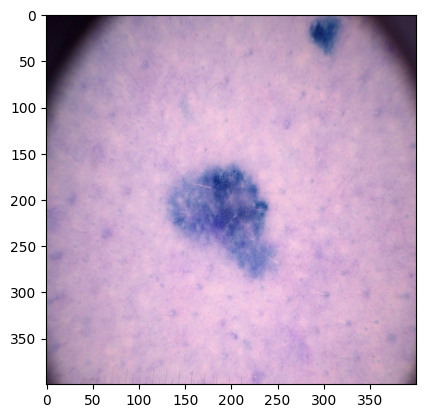

In [11]:
x,y = next(iter(dataloader))
plt.imshow(x[0])

In [12]:
import gc
import timm
device='cuda'
model = (timm.create_model('regnetx_016', drop_path_rate=.0,num_classes=1,pretrained=True))
model.to(device)
optimizer = optim.AdamW(model.parameters(),lr=0.0004,weight_decay=0.0001)
gamma = .9994
scheduler = ExponentialLR(optimizer, gamma=gamma)
num_epochs = 60

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for x,y in dataloader:
        x = x.permute(0,3,1,2)
        optimizer.zero_grad()
        outputs= model(x.to(device))
        loss = criterion(outputs.squeeze(1), y.to(device))
        loss.backward()
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(dataloader)
    
    model.eval()
    running_loss2=0
    with torch.no_grad():
        for x,y_tst in test_dataloader:
            x = x.permute(0,3,1,2)
            outputs_tst = model(x.to(device))
            loss2 = criterion(outputs_tst.squeeze(1), y_tst.to(device))
            running_loss2 += loss2.item()
    epoch_loss2 = running_loss2 / len(test_dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.5f},  Test Loss: {epoch_loss2:.5f}, Learning Rate: {optimizer.param_groups[0]['lr']:.7f}")
    torch.cuda.empty_cache()
    gc.collect()
print("Training finished!")

Epoch [1/60], Loss: 375.04978,  Test Loss: 870.94969, Learning Rate: 0.0003675
Epoch [2/60], Loss: 367.82320,  Test Loss: 869.34585, Learning Rate: 0.0003377
Epoch [3/60], Loss: 362.48132,  Test Loss: 864.97766, Learning Rate: 0.0003103
Epoch [4/60], Loss: 359.32039,  Test Loss: 864.82072, Learning Rate: 0.0002851


KeyboardInterrupt: 

In [36]:
labels_test

tensor([1., 1., 1., 1., 0., 1., 4., 0., 1., 0., 1., 1., 5., 1., 1., 1., 1., 0.,
        4., 1., 1., 1., 1., 3., 5., 2., 2., 0., 1., 1., 4., 4., 4., 1., 1., 1.,
        1., 1., 1., 2., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 4., 1.,
        2., 1., 1., 1., 1., 1., 1., 0., 1., 1., 6., 4., 3., 1., 1., 6., 1., 1.,
        1., 1., 1., 4., 4., 4., 1., 1., 5., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        5., 1., 1., 1., 0., 1., 6., 2., 1., 1., 1., 1., 4., 4., 0., 2., 4., 1.,
        1., 1., 1., 1., 3., 1., 4., 1., 4., 1., 1., 1., 4., 1., 1., 1., 1., 2.,
        2., 1., 1., 4., 2., 1., 1., 1., 1., 1., 1., 2., 1., 4., 4., 1., 2., 0.,
        3., 1., 2., 4., 2., 1., 1., 2., 1., 0., 1., 2., 1., 3., 1., 1., 1., 1.,
        3., 1., 3., 4., 2., 1., 1., 6., 1., 4., 1., 1., 1., 0., 0., 1., 1., 1.,
        1., 1., 1., 4., 4., 1., 1., 1., 4., 4., 0., 1., 4., 1., 1., 1., 1., 1.,
        2., 4., 1., 1., 1., 1., 1., 3., 1., 1., 1., 2., 0., 3., 1., 1., 1., 1.,
        3., 1., 1., 0., 1., 1., 1., 1., 

In [16]:
from torchmetrics.classification import (
    MulticlassF1Score,
    MulticlassPrecision,
    MulticlassRecall,
    MulticlassAccuracy,
    MulticlassROC,
    MulticlassAUROC,
)

def find_optim_thres(fpr, tpr, thresholds):
    optim_thres = thresholds[0]
    inx = 0
    min_dist = 1.0
    for i in range(len(fpr)):
        dist = np.linalg.norm(np.array([0.0, 1.0]) - np.array([fpr[i], tpr[i]]))
        if dist < min_dist:
            min_dist = dist
            optim_thres = thresholds[i]
            inx = i
            
    return optim_thres, inx
    
def test_model(model,criterion,dataloader, threshold=.5):
    device='cuda'
    since = time.time()
    metricf1 = MulticlassF1Score(num_classes=7)
    precision = MulticlassPrecision(num_classes=7)
    recall = MulticlassRecall(num_classes=7)
    accuracy = MulticlassAccuracy(num_classes=7)
    roc = MulticlassROC(num_classes=7)
    auc = MulticlassAUROC(num_classes=7)
    stop_count = 0
    best_f1 = -1.0
    test_metrics = {'loss' : [], 'acc' : [], 'f1': [], 'precision': [], 'recall': [], 'auc': []}
    # inital threshold for first epoch, it will change afterwards
#     threshold = 0.5
    print('Starting testing...')
    # empty 'all' tensors for saving
    all_outputs = torch.Tensor([])
    all_labels = torch.Tensor([])
    model.eval()   # Set model to evaluate mode
    running_loss = 0.0
    n_samples = 0
    n_correct = 0
    running_f1 = 0.0
    # Iterate over data.
    for inputs, labels in (dataloader):
        labels = torch.unsqueeze(torch.tensor(labels), 1).to(dtype=torch.float)               
        #labels=torch.tensor(labels)
        inputs = inputs.permute(0,3,1,2)
        inputs = inputs.float().to(device)
        #inputs = inputs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
        # zero the parameter gradients
            outputs = model(inputs)
            #preds = (outputs > threshold).double()
            # concatenating all outputs and labels for calculation aoc and new threshold
            all_outputs = torch.cat((all_outputs, outputs.to('cpu')))
            all_labels = torch.cat((all_labels, labels.to('cpu')))                  
            #print(labels)
            # _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
        running_loss += loss.item()
        #n_correct += (preds == labels).sum().item()
        # collect any unused memmory
        gc.collect()
        torch.cuda.empty_cache()  
        
    # statistics
    epoch_loss = running_loss / len(dataloader)            
    # find true positive and false positive rates for ROC curve
    #print ('outputs: ', all_outputs, 'labels', all_labels)
    all_labels=all_labels.to(dtype=torch.long)
    fpr, tpr, thresholds = roc(all_outputs, all_labels)
    epoch_auc = auc(all_outputs, all_labels)
    # find new threshold
    threshold, _ = find_optim_thres(fpr, tpr, thresholds)
    print(f'New threshold is {threshold}')
    # calculate metrics using new optimized threshold
    epoch_f1 = metricf1(all_outputs > threshold, all_labels)
    epoch_acc = accuracy(all_outputs > threshold, all_labels)
    epoch_precision = precision(all_outputs > threshold, all_labels)
    epoch_recall = recall(all_outputs > threshold, all_labels)
    # save all of the statistics for latter analysis
    test_metrics['loss'].append(epoch_loss)
    test_metrics['acc'].append(epoch_acc)
    test_metrics['f1'].append(epoch_f1)
    test_metrics['precision'].append(epoch_precision)
    test_metrics['recall'].append(epoch_recall)
    test_metrics['auc'].append(epoch_auc)               
    time_elapsed = time.time() - since

    print(f'Inference complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'F1 Score = : {epoch_f1:4f}')
    print(f'AUC Score = : {epoch_auc:4f}')
    print(f'Acc Score = : {epoch_acc:4f}')
    return test_metrics

In [17]:
import time
import tqdm
test_metrics = test_model(model, criterion, test_dataloader)

model_name = 'regnetx_016_ham10000'
PATH='weights/'+model_name
torch.save(model.state_dict(), PATH)

Starting testing...


C:\Users\marcb\AppData\Local\Temp\ipykernel_19660\460880712.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.unsqueeze(torch.tensor(labels), 1).to(dtype=torch.float)


RuntimeError: 0D or 1D target tensor expected, multi-target not supported

In [26]:
from torchmetrics.classification import (
    MultilabelF1Score,
    MultilabelPrecision,
    MultilabelRecall,
    MultilabelAccuracy,
    MultilabelAUROC
)



In [30]:
def test_model(model, criterion, dataloader, threshold=0.5):
    model.eval()
    running_loss = 0.0
    n_correct = 0
    n_samples = 0
    all_outputs = torch.tensor([], dtype=torch.float).to('cpu')
    all_labels = torch.tensor([], dtype=torch.float).to('cpu')
    num_classes=7
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.permute(0,3,2,1)
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            all_outputs = torch.cat((all_outputs, outputs.to('cpu')))
            all_labels = torch.cat((all_labels, labels.to('cpu')))

            loss = criterion(outputs, labels)
            running_loss += loss.item()

    metrics = {}
    metrics['loss'] = running_loss / len(dataloader)

    f1 = MultilabelF1Score(num_labels=num_classes)
    auroc = MultilabelAUROC(num_labels=num_classes)
    precision = MultilabelPrecision(num_labels=num_classes)
    recall = MultilabelRecall(num_labels=num_classes)
    accuracy = MultilabelAccuracy(num_labels=num_classes)
    print(all_outputs[0])
    f1(all_outputs, all_labels)
    precision(all_outputs, all_labels)
    recall(all_outputs, all_labels)
    accuracy(all_outputs, all_labels)
    auroc(all_outputs, all_labels)
    
    metrics['auroc'] = auroc.compute()
    metrics['f1'] = f1.compute()
    metrics['precision'] = precision.compute()
    metrics['recall'] = recall.compute()
    metrics['accuracy'] = accuracy.compute()

    return metrics

test_metrics = test_model(model, criterion, test_dataloader)


tensor([1.7391e-11, 1.0000e+00, 2.7580e-08, 5.8702e-09, 2.5729e-09, 6.7674e-08,
        1.2359e-06])


ValueError: Expected argument `target` to be an int or long tensor with ground truth labels but got tensor with dtype torch.float32

In [29]:
all_outputs>.5

NameError: name 'all_outputs' is not defined

In [35]:
x=torch.tensor([1.7391e-11, 1.0000e+00, 2.7580e-08, 5.8702e-09, 2.5729e-09, 6.7674e-08,
        1.2359e-06])
np.argmax(x)

tensor(1)

In [36]:
model_name = 'regnetx_016_ham10000'
PATH='weights/'+model_name
torch.save(model.state_dict(), PATH)

# Dermatology Disease Classification (Scin)

### Binary Classification for Image Quality - if image quality is bad, prompt user to retake picture
### Multiclass weighted skin condition prediction
### Multiclass Fitzpatrick Classification
### Multiclass Monk Skin Tone Classification
For multiclass, only use data with good image quality

### Binary Classification for Image Quality - if image quality is bad, prompt user to retake picture


In [1]:
import pandas as pd
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import cv2
# path1_test= '../datasets/cancer/multiclass/ISIC/Test/'
# p1=os.listdir(path1_test)
# full_files=[]
# full_labels=[]
base='../datasets/disease/scin/'
meta = pd.read_csv(base+'scin_labels.csv')
meta

,case_id,dermatologist_gradable_for_skin_condition_1,dermatologist_gradable_for_skin_condition_2,dermatologist_gradable_for_skin_condition_3,dermatologist_skin_condition_on_label_name,dermatologist_skin_condition_confidence,weighted_skin_condition_label,dermatologist_gradable_for_fitzpatrick_skin_type_1,dermatologist_gradable_for_fitzpatrick_skin_type_2,dermatologist_gradable_for_fitzpatrick_skin_type_3,dermatologist_fitzpatrick_skin_type_label_1,dermatologist_fitzpatrick_skin_type_label_2,dermatologist_fitzpatrick_skin_type_label_3,gradable_for_monk_skin_tone_india,gradable_for_monk_skin_tone_us,monk_skin_tone_label_india,monk_skin_tone_label_us
0,-1000600354148496558,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Inflicted skin lesions', 'Eczema', 'Irritant...","[4, 4, 3]","{'Inflicted skin lesions': 0.41, 'Eczema': 0.4...",YES,NaN,NaN,FST2,NaN,NaN,True,True,2.0,1.0
1,-1002039107727665188,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Prurigo nodularis', 'Actinic Keratosis', 'SC...","[4, 3, 4]","{'Prurigo nodularis': 0.41, 'SCC/SCCIS': 0.41,...",YES,NaN,NaN,FST1,NaN,NaN,True,True,3.0,3.0
2,-1003358831658393077,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Impetigo', 'Herpes Zoster', 'Bullous dermati...","[2, 1, 1]","{'Impetigo': 0.55, 'Herpes Zoster': 0.23, 'Bul...",YES,NaN,NaN,FST4,NaN,NaN,True,True,3.0,4.0
3,-1003826561155964328,NO_IMAGE_QUALITY_INSUFFICIENT,NaN,NaN,[],[],{},NO,NaN,NaN,NaN,NaN,NaN,True,True,2.0,4.0
4,-1003844406100696311,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Lichen planus/lichenoid eruption', 'Follicul...","[1, 1, 1]","{'Lichen planus/lichenoid eruption': 0.33, 'Fo...",YES,NaN,NaN,FST1,NaN,NaN,True,True,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5028,973759811984683137,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,"['CD - Contact dermatitis', 'Allergic Contact ...","[5, 4, 5]","{'CD - Contact dermatitis': 0.33, 'Allergic Co...",YES,YES,YES,FST2,FST2,FST3,True,True,4.0,4.0
5029,973872028150293734,NO_IMAGE_QUALITY_INSUFFICIENT,NaN,NaN,[],[],{},NO,NaN,NaN,NaN,NaN,NaN,True,True,2.0,1.0
5030,983265958160210646,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Impetigo', 'Foreign body']","[1, 1]","{'Impetigo': 0.5, 'Foreign body': 0.5}",YES,NaN,NaN,FST5,NaN,NaN,True,True,4.0,5.0
5031,995820220956352730,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Erythema gyratum repens', 'Seborrheic Dermat...","[2, 2, 2]","{'Erythema gyratum repens': 0.33, 'Seborrheic ...",YES,NaN,NaN,FST4,NaN,NaN,True,True,3.0,2.0


In [2]:
good_index=[]
for i in range(len(meta)):
    grade=meta.dermatologist_gradable_for_skin_condition_1[i]
    if 'INSUFFICIENT' in grade:
        print(i, grade)
    else:
        good_index.append(i)

3 NO_IMAGE_QUALITY_INSUFFICIENT
6 NO_IMAGE_QUALITY_INSUFFICIENT
12 NO_IMAGE_QUALITY_INSUFFICIENT
14 NO_IMAGE_QUALITY_INSUFFICIENT
16 NO_IMAGE_QUALITY_INSUFFICIENT
20 NO_IMAGE_QUALITY_INSUFFICIENT
26 NO_IMAGE_QUALITY_INSUFFICIENT
29 NO_IMAGE_QUALITY_INSUFFICIENT
31 NO_IMAGE_QUALITY_INSUFFICIENT
32 NO_IMAGE_QUALITY_INSUFFICIENT
34 NO_IMAGE_QUALITY_INSUFFICIENT
36 NO_IMAGE_QUALITY_INSUFFICIENT
37 NO_IMAGE_QUALITY_INSUFFICIENT
41 NO_IMAGE_QUALITY_INSUFFICIENT
42 NO_IMAGE_QUALITY_INSUFFICIENT
45 NO_IMAGE_QUALITY_INSUFFICIENT
46 NO_IMAGE_QUALITY_INSUFFICIENT
47 NO_IMAGE_QUALITY_INSUFFICIENT
48 NO_IMAGE_QUALITY_INSUFFICIENT
50 NO_IMAGE_QUALITY_INSUFFICIENT
53 NO_IMAGE_QUALITY_INSUFFICIENT
54 NO_IMAGE_QUALITY_INSUFFICIENT
63 NO_IMAGE_QUALITY_INSUFFICIENT
65 NO_IMAGE_QUALITY_INSUFFICIENT
66 NO_IMAGE_QUALITY_INSUFFICIENT
68 NO_IMAGE_QUALITY_INSUFFICIENT
70 NO_IMAGE_QUALITY_INSUFFICIENT
71 NO_IMAGE_QUALITY_INSUFFICIENT
74 NO_IMAGE_QUALITY_INSUFFICIENT
78 NO_IMAGE_QUALITY_INSUFFICIENT
79 NO_IMAGE_

In [3]:
len(good_index)

3108

In [4]:
meta2 = pd.read_csv(base+'scin_cases.csv')
good_cases = meta.case_id[good_index]
good_cases2 = meta2.image_1_path[good_index]
file_paths=[]
for i in range(len(good_index)):
    file_paths.append(base+'images/'+str(good_cases2.iloc[i][15:]))


In [5]:
file_paths

['../datasets/disease/scin/images/-3205742176803893704.png',
 '../datasets/disease/scin/images/-4762289084741430925.png',
 '../datasets/disease/scin/images/-4027806997035329030.png',
 '../datasets/disease/scin/images/-3799298995660217860.png',
 '../datasets/disease/scin/images/-3575683440831198879.png',
 '../datasets/disease/scin/images/-220649468572111832.png',
 '../datasets/disease/scin/images/-217828380359571871.png',
 '../datasets/disease/scin/images/8406712750126834903.png',
 '../datasets/disease/scin/images/-3712452163219577722.png',
 '../datasets/disease/scin/images/-1677898261371801194.png',
 '../datasets/disease/scin/images/2919857728265265465.png',
 '../datasets/disease/scin/images/-3482201713629668213.png',
 '../datasets/disease/scin/images/-2343989119243327962.png',
 '../datasets/disease/scin/images/-341324569907477536.png',
 '../datasets/disease/scin/images/-7488721783507435350.png',
 '../datasets/disease/scin/images/7624703560142571231.png',
 '../datasets/disease/scin/ima

In [6]:
file_paths.pop(160)

'../datasets/disease/scin/images/-2243186711511406658.png'

In [7]:
from joblib import Parallel, delayed
import cv2
import numpy as np

def process_image(i, file_paths):
    im = cv2.resize(cv2.imread(file_paths[i]), [500, 500], interpolation=cv2.INTER_LANCZOS4)
    im = (im - np.nanmin(im)) / (np.nanmax(im) - np.nanmin(im))
    im = np.nan_to_num(im)
    return im

images = np.zeros([len(file_paths), 500, 500, 3])

results = Parallel(n_jobs=16)(delayed(process_image)(i, file_paths) for i in range(len(file_paths)))

for i, im in enumerate(results):
    images[i] = im

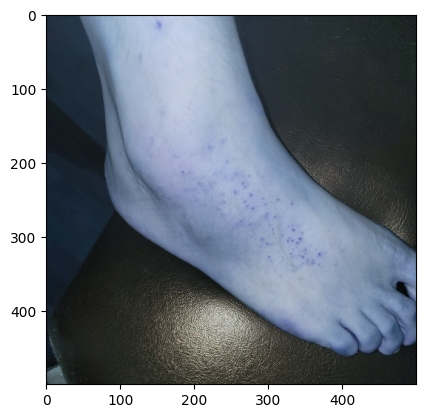

In [8]:
plt.imshow(images[0])

In [9]:
labels=list(meta.weighted_skin_condition_label[good_index])
labels.pop(160)
labels

["{'Inflicted skin lesions': 0.41, 'Eczema': 0.41, 'Irritant Contact Dermatitis': 0.18}",
 "{'Prurigo nodularis': 0.41, 'SCC/SCCIS': 0.41, 'Actinic Keratosis': 0.18}",
 "{'Impetigo': 0.55, 'Herpes Zoster': 0.23, 'Bullous dermatitis': 0.23}",
 "{'Lichen planus/lichenoid eruption': 0.33, 'Folliculitis': 0.33, 'Dermatosis due to flea': 0.33}",
 "{'Drug Rash': 0.41, 'Viral Exanthem': 0.41, 'Eczema': 0.18}",
 "{'Basal Cell Carcinoma': 0.55, 'Inflicted skin lesions': 0.27, 'SCC/SCCIS': 0.18}",
 "{'Eczema': 0.67, 'Psoriasis': 0.11, 'Acute and chronic dermatitis': 0.11, 'Post-Inflammatory hyperpigmentation': 0.11}",
 "{'Purpura': 1.0}",
 "{'Eczema': 0.55, 'Drug Rash': 0.23, 'Allergic Contact Dermatitis': 0.23}",
 "{'Urticaria': 1.0}",
 "{'Skin infection': 0.33, 'Scabies': 0.33, 'Molluscum Contagiosum': 0.33}",
 "{'Tinea Versicolor': 0.46, 'Urticaria': 0.35, 'Pityriasis rubra pilaris': 0.1, 'Psoriasis': 0.1}",
 "{'Stasis Dermatitis': 0.33, 'Eczema': 0.33, 'Allergic Contact Dermatitis': 0.33}",


In [10]:
len(file_paths)

3107

In [11]:
len(labels)

3107

In [22]:
import torch
import torch.nn as nn
import timm
from sklearn.preprocessing import MultiLabelBinarizer
import ast

        
def parse_label_string(label_string):
    return ast.literal_eval(label_string)
    
def preprocess_labels(labels):
    # Parse label strings into dictionaries
    label_dicts = [parse_label_string(label) for label in labels]
    
    # Extract all unique classes from the label dictionaries
    all_classes = set()
    for label_dict in label_dicts:
        all_classes.update(label_dict.keys())
    all_classes = sorted(list(all_classes))
    
    # Create a MultiLabelBinarizer to one-hot encode the labels
    mlb = MultiLabelBinarizer()
    
    # Fit the MultiLabelBinarizer with all classes
    mlb.fit([all_classes])
    
    # Convert label dictionaries to weighted one-hot encoded arrays
    weighted_labels = []
    for label_dict in label_dicts:
        classes = list(label_dict.keys())
        weights = [label_dict[c] for c in classes]
        label_vector = mlb.transform([classes])[0]
        weighted_label = np.zeros(len(all_classes))
        weighted_label[label_vector == 1] = weights
        weighted_labels.append(weighted_label)
    
    return torch.tensor(weighted_labels, dtype=torch.float32)

# Assuming you have a list of label dictionaries called 'labels'


# Preprocess the labels
preprocessed_labels = preprocess_labels(labels)

# Get the number of classes
num_classes = preprocessed_labels.shape[1]

import timm

class MulticlassClassifier(nn.Module):
    def __init__(self, num_classes, pretrained_model='regnetx_032'):
        super(MulticlassClassifier, self).__init__()
        self.model = timm.create_model(pretrained_model, pretrained=True, num_classes=num_classes,drop_path_rate=.6)
        
    def forward(self, x):
        return self.model(x)
        
# # Create an instance of the model
# model = MulticlassClassifier(num_classes)

# # # Define the loss function and optimizer
# criterion = nn.BCEWithLogitsLoss()
# optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
# model.to(device)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(torch.tensor(images), preprocessed_labels, test_size=0.1, random_state=42)


In [23]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        images = self.images[index]
        labels = self.labels[index]
        return images.float(), labels.float()

from torch.optim.lr_scheduler import ExponentialLR
import torch.optim as optim
import torch.nn as nn

dataset = CustomDataset(X_train, y_train)
# Create a dataloader
batch_size = 32

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,drop_last=False,num_workers=0)#,sampler=sampler)
dataset_test = CustomDataset(X_test,y_test)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 64
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)



In [15]:
x,y = next(iter(dataloader))

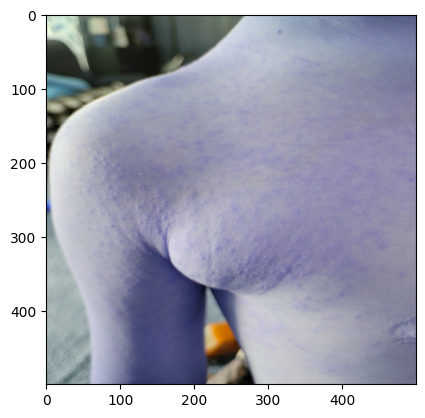

In [16]:
plt.imshow(x[0])

In [24]:
device='cuda'
model = MulticlassClassifier(num_classes)
model.to(device)
import gc

# # Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0006, weight_decay=.5)
gamma = .998
scheduler = ExponentialLR(optimizer, gamma=gamma)
num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for x,y in dataloader:
        x = x.permute(0,3,1,2)
        optimizer.zero_grad()
        outputs= model(x.to(device))
        loss = criterion(outputs.squeeze(1), y.to(device))
        loss.backward()
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(dataloader)
    torch.cuda.empty_cache()
    gc.collect()
    
    model.eval()
    running_loss2=0
    with torch.no_grad():
        for x,y_tst in test_dataloader:
            x = x.permute(0,3,1,2)
            outputs_tst = model(x.to(device))
            loss2 = criterion(outputs_tst.squeeze(1), y_tst.to(device))
            running_loss2 += loss2.item()
    epoch_loss2 = running_loss2 / len(test_dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.5f},  Test Loss: {epoch_loss2:.5f}, Learning Rate: {optimizer.param_groups[0]['lr']:.7f}")
    torch.cuda.empty_cache()
    gc.collect()
print("Training finished!")

Epoch [1/30], Loss: 0.09757,  Test Loss: 0.02108, Learning Rate: 0.0005031
Epoch [2/30], Loss: 0.01543,  Test Loss: 0.02325, Learning Rate: 0.0004218
Epoch [3/30], Loss: 0.01424,  Test Loss: 0.02287, Learning Rate: 0.0003537
Epoch [4/30], Loss: 0.01396,  Test Loss: 0.02299, Learning Rate: 0.0002966
Epoch [5/30], Loss: 0.01372,  Test Loss: 0.02091, Learning Rate: 0.0002487
Epoch [6/30], Loss: 0.01365,  Test Loss: 0.01983, Learning Rate: 0.0002085
Epoch [7/30], Loss: 0.01354,  Test Loss: 0.01912, Learning Rate: 0.0001748
Epoch [8/30], Loss: 0.01351,  Test Loss: 0.01990, Learning Rate: 0.0001466
Epoch [9/30], Loss: 0.01340,  Test Loss: 0.01987, Learning Rate: 0.0001229
Epoch [10/30], Loss: 0.01342,  Test Loss: 0.02098, Learning Rate: 0.0001030
Epoch [11/30], Loss: 0.01343,  Test Loss: 0.02115, Learning Rate: 0.0000864
Epoch [12/30], Loss: 0.01336,  Test Loss: 0.02015, Learning Rate: 0.0000724
Epoch [13/30], Loss: 0.01333,  Test Loss: 0.01909, Learning Rate: 0.0000607
Epoch [14/30], Loss: 

KeyboardInterrupt: 

In [92]:
preprocessed_labels.shape

torch.Size([3107, 364])

In [106]:
torch.cuda.empty_cache()
gc.collect()

497

In [25]:
model_name = 'regnetx_032_scin_diseases'
PATH='weights/'+model_name
torch.save(model.state_dict(), PATH)